## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [61]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [62]:
train, test = keras.datasets.cifar10.load_data()

In [63]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    if flatten:
        x = x.reshape((len(x), -1)).astype('float32')
    
    for i in range(len(x)):
        x[i] = (x[i] - min(x[i])) / (max(x[i]) - min(x[i])) * 2 - 1
        
#     print(x.min(axis=1).shape)
#     _min = x.min(axis=1)
#     _max = x.max(axis=1)
#     x = ((x - _min) / (_max - _min) * 2) - 1
    return x

def preproc_y(y, num_class=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_class)
    return y

In [64]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [66]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, num_class=10):
    input_layer = keras.models.Input(input_shape)
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    x = keras.layers.Dense(units=64, activation='relu')(x)
    x = keras.layers.Dense(units=32, activation='relu')(x)
    out = keras.layers.Dense(units=num_class, activation='softmax')(x)
    model = keras.models.Model(input=[input_layer], output=[out])
    return model
model = build_mlp(x_train.shape[1:])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  if sys.path[0] == '':


In [67]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [68]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [69]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.7332 - accuracy: 0.3866 - val_loss: 1.5498 - val_accuracy: 0.4584
Epoch 2/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.4926 - accuracy: 0.4714 - val_loss: 1.4574 - val_accuracy: 0.4881
Epoch 3/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.3635 - accuracy: 0.5196 - val_loss: 1.4128 - val_accuracy: 0.4995
Epoch 4/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.2658 - accuracy: 0.5515 - val_loss: 1.3701 - val_accuracy: 0.5233
Epoch 5/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.1791 - accuracy: 0.5848 - val_loss: 1.3664 - val_accuracy: 0.5256
Epoch 6/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.1069 - accuracy: 0.6108 - val_loss: 1.3699 - val_accuracy: 0.5230
Epoch 7/100
50000/50000 [==============================] - 3s 

Epoch 56/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.0753 - accuracy: 0.9746 - val_loss: 4.0281 - val_accuracy: 0.5336
Epoch 57/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.1112 - accuracy: 0.9632 - val_loss: 3.7849 - val_accuracy: 0.5267
Epoch 58/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.1003 - accuracy: 0.9677 - val_loss: 3.9037 - val_accuracy: 0.5261
Epoch 59/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.0827 - accuracy: 0.9724 - val_loss: 4.0095 - val_accuracy: 0.5303
Epoch 60/100
50000/50000 [==============================] - 3s 57us/step - loss: 0.0765 - accuracy: 0.9741 - val_loss: 4.0532 - val_accuracy: 0.5306
Epoch 61/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.0888 - accuracy: 0.9713 - val_loss: 4.0617 - val_accuracy: 0.5307
Epoch 62/100
50000/50000 [==============================] - 3s 57us/step - loss: 0.1187 - accuracy: 0.9623

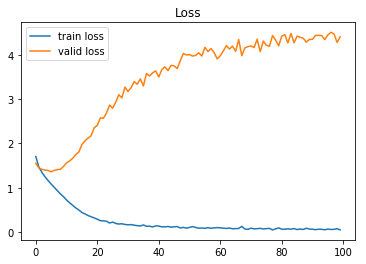

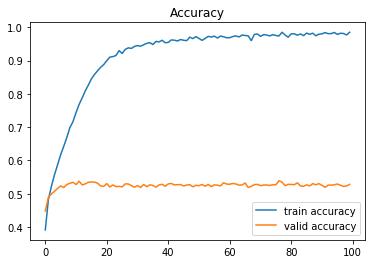

In [60]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()